<a href="https://colab.research.google.com/github/Rigved19/Machine-Learning-Projects/blob/main/ML%20Clustering%20Algorithms/Successful_Clustering__Using_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PS : Label Data with Correct Gear Ratio based on features provided : Speed, RPM, Engine Load.

Unsupervised Learning:
Clustering Algorithm Used : DBSCAN

###Step 1 : Importing relevant libraries 

In [108]:
import numpy as np
import pandas as pd
from numpy import unique
from numpy import where
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler , StandardScaler

### Step 2 : Inforrmation Gathering

In [109]:
### Information Gathering

data = pd.read_csv ("/content/unlabelled_data.csv")
data.head(20)

,Id,Speed,RPM,Engine Load
0,131505,7,898,44
1,133384,7,898,44
2,131504,1,917,32
3,133424,1,917,32
4,131503,0,774,38
5,133468,0,774,38
6,131502,0,776,38
7,133495,0,776,38
8,133523,0,782,39
9,131501,0,782,39


In [110]:
print(data.describe(), '\n')
print(data.info())
print(data.isnull().sum())

                  Id         Speed           RPM   Engine Load
count   13726.000000  13726.000000  13726.000000  13726.000000
mean   454117.188912     28.282821   1224.099301     31.287119
std    217035.672940     22.714017    504.335148     22.677319
min    131501.000000      0.000000      0.000000      0.000000
25%    269089.250000      7.000000    894.000000     10.000000
50%    378304.500000     27.000000   1295.000000     32.000000
75%    673087.750000     47.000000   1586.000000     47.000000
max    778837.000000    200.000000   3290.000000    100.000000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13726 entries, 0 to 13725
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Id           13726 non-null  int64
 1   Speed        13726 non-null  int64
 2   RPM          13726 non-null  int64
 3   Engine Load  13726 non-null  int64
dtypes: int64(4)
memory usage: 429.1 KB
None
Id             0
Speed          0
RPM 

In [111]:
df.corr()

,Id,Speed,RPM,Engine Load
Id,1.000000,-0.075233,-0.072383,-0.016155
Speed,-0.075233,1.000000,0.607064,-0.124838
RPM,-0.072383,0.607064,1.000000,-0.109686
Engine Load,-0.016155,-0.124838,-0.109686,1.000000


### Step 3 : Data Cleaning


*   **Speed = 0** : Delete such rows because that means the clutch is not pressed, and there can be no information fetched about the Gearbox ratio of the car.
*   **RPM = 0 and Speed != 0** : Front fill since in 2 secs there is no drastic change in RPM. Other option is Delete Row. Method Used - Front Fill.

*   Delete **Engine Load** Data :  Gives no new information about Gear Ratio






In [112]:
## Data Cleaning

df = data[data["Speed"] != 0]   #Deleting Rows with Speed Value as 0

for x in range(df.shape[0]):     #Frontfilling RPM = 0 values
  if df.iloc[x]["RPM"] == 0:
    df.iloc[x]["RPM"] = df.iloc[x-1]["RPM"]  

a = df[df["Engine Load"] == 0 ].index  ## Removing rows with Engine Load =0
df.drop(a , axis = 0 , inplace = True)     

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Step 4 : Data Visualisation and Preprocessing

1. For cleanear visualisation of cluster/group formation
  * Delete rows with RPM < 1000
  * Delete rows with RPM > 2500
  * Dele rows with Speed > 90

2. Transforming the data
   *  Normalizing
   *  Standardization


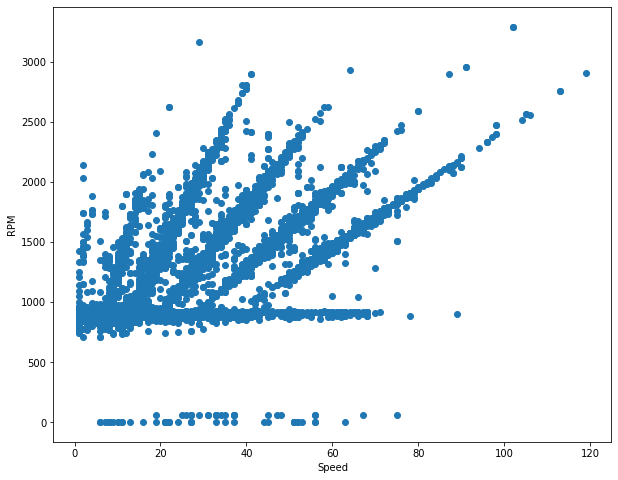

In [113]:
vis_x = df["Speed"].to_numpy()
vis_y = df["RPM"].to_numpy()

plt.figure( figsize=(10,8))
plt.xlabel("Speed")
plt.ylabel("RPM") 
plt.scatter(vis_x , vis_y)
plt.show()

In [114]:
### Data Preprocessing

idx = df[df["RPM"] < 1000].index  #Delete rows with RPM < 1000
df1 = df.drop( idx, axis = 0)

idx =  df1[df1["RPM"] > 2500].index  #Delete rows with RPM > 2500
df1 = df1.drop (idx , axis = 0)

idx = df1[df1["Speed"] > 90].index  #Dele rows with Speed > 90
df1 = df1.drop (idx , axis = 0)

In [115]:
count  = df1[df1["RPM"] < 1000]   #Testing
print(count)

Empty DataFrame
Columns: [Id, Speed, RPM, Engine Load]
Index: []


In [116]:
train = df1.copy()
x = train["Speed"].to_numpy()
y = train["RPM"].to_numpy()
X = train.iloc[:,[1,2]].values   #Loading RPM and Speed Cloumns

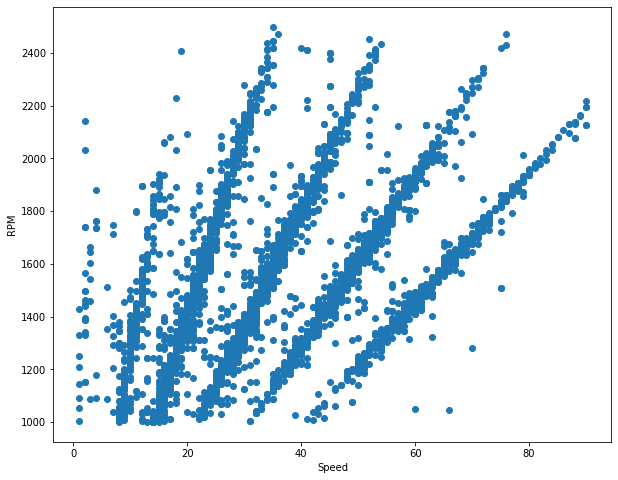

In [117]:
plt.figure( figsize=(10,8))
plt.xlabel("Speed")
plt.ylabel("RPM") 
plt.scatter(x , y)
plt.show()

In [118]:
### Scaling the Data
y_reshaped = y.reshape(-1,1)
x_reshaped = x.reshape(-1,1)
Standard = StandardScaler()

# Normalization 
MinMax1 = MinMaxScaler(feature_range = (0.001,1))
y_scaled = MinMax1.fit_transform(y_reshaped)
MinMax2 = MinMaxScaler(feature_range = (0.001,1))
x_scaled = MinMax2.fit_transform(x_reshaped)
X_scaled = np.concatenate( (x_scaled , y_scaled) , axis = 1)  

#y_scaled= Standard.fit_transform(y_reshaped)
#x_scaled= Standard.fit_transform(x_reshaped)

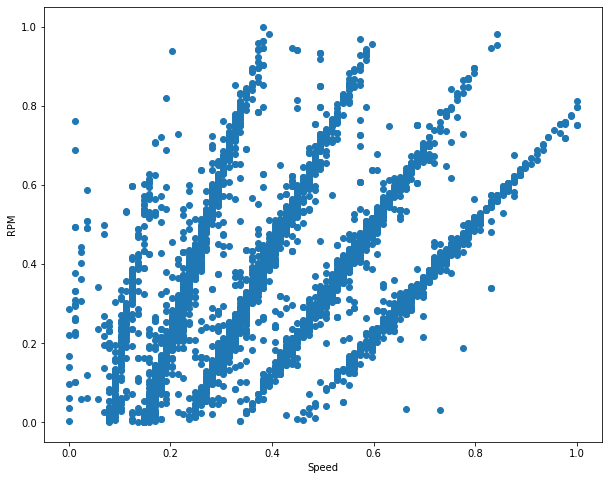

In [119]:
plt.figure(figsize=(10,8))
plt.xlabel("Speed")
plt.ylabel("RPM") 
plt.scatter(x_scaled , y_scaled)
plt.show()

### Step 5 : Aplpying DBSCAN Clustering Algorithm

In [120]:
##Using DBSCAN Clustering Algorithm 
### After lot of trial error...

model1 = DBSCAN(eps = 0.021 , min_samples=5)  #Taking  eps/min = 0.021/5

clusters1 = model1.fit_predict(X_scaled)
n_clusters1 = len(set(clusters1))
print("Model1 Clusters" , clusters1)
print("No. of clusters" , n_clusters1, '\n')

model2 = DBSCAN(eps= 0.025 , min_samples=11)  #Taking eps/min 0.25/11

clusters2 = model2.fit_predict(X_scaled)
n_clusters2 = len(set(clusters2))
print("Model2 Clusters" , clusters2)
print("No. of clusters" , n_clusters2)


Model1 Clusters [0 0 0 ... 0 3 3]
No. of clusters 16 

Model2 Clusters [0 0 0 ... 0 2 2]
No. of clusters 9


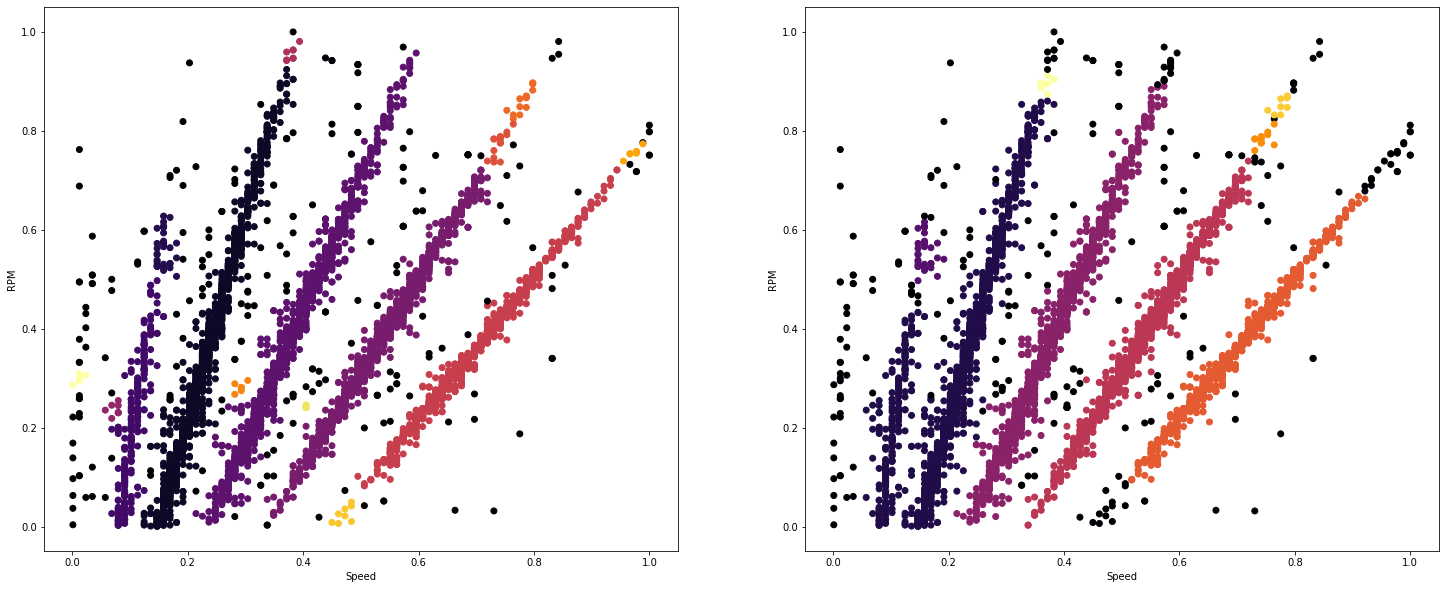

In [121]:
#Potting both the Models

plt.figure( figsize=(25,10))
plt.subplot(1,2,1)
plt.xlabel("Speed")
plt.ylabel("RPM") 
plt.scatter(x_scaled , y_scaled , c = clusters1, cmap="inferno")


plt.subplot (1,2,2)
plt.xlabel("Speed")
plt.ylabel("RPM") 
plt.scatter(x_scaled , y_scaled , c = clusters2, cmap="inferno")


#### After lot of trial an error with the parameter values. 
We select Model 1, since it clusters almost all data points (excluding the noise point) in one of the desired clusters.

In [122]:
df1["Cluster Labels"] = clusters1    #Creating new column and storing Cluster Label Values for each data point
p = df1.index

### Sperating data points belonging to each clusters in colors (dict)
### Used for better plotting visualisation

colors = {}
df1["row_no"] = range(df1.shape[0])

for i in range(1,15) :
  colors["clr" + str(i)] = np.zeros_like(clusters1)
  a = df1[df1["Cluster Labels"] == i].index 
  p = colors["clr"+str(i)]
  for x in a :
    row = df1.loc[x]["row_no"]
    p[row] = df1.loc[x]["Cluster Labels"]                     

colors["clr" + str(0)] = np.ones_like(clusters1)
colors["clr" + str(-1)] = np.zeros_like(clusters1)
a = df1[df1["Cluster Labels"] == 0].index
p = colors["clr"+str(0)]
for x in a :
  row = df1.loc[x]["row_no"]
  p[row] = df1.loc[x]["Cluster Labels"]

a = df1[df1["Cluster Labels"] == -1].index
p = colors["clr"+str(-1)]
for x in a :
  row = df1.loc[x]["row_no"]
  p[row] = df1.loc[x]["Cluster Labels"]

In [123]:
print(df1.head(10), '\n')
print(colors)

        Id  Speed   RPM  Engine Load  Cluster Labels  row_no
59  135548     25  1783           43               0       0
60  135547     24  1654            1               0       1
64  135675     15  1353            9               0       2
65  135790     24  1706           41               0       3
66  135738     24  1706           41               0       4
67  135830     25  1783           31               0       5
68  135829     26  1778           20               0       6
69  135909     22  1550            9               0       7
83  136450      2  1396           55              -1       8
88  136617     17  1240           72               0       9 

{'clr1': array([0, 0, 0, ..., 0, 0, 0]), 'clr2': array([0, 0, 0, ..., 0, 0, 0]), 'clr3': array([0, 0, 0, ..., 0, 3, 3]), 'clr4': array([0, 0, 0, ..., 0, 0, 0]), 'clr5': array([0, 0, 0, ..., 0, 0, 0]), 'clr6': array([0, 0, 0, ..., 0, 0, 0]), 'clr7': array([0, 0, 0, ..., 0, 0, 0]), 'clr8': array([0, 0, 0, ..., 0, 0, 0]), 'clr9'

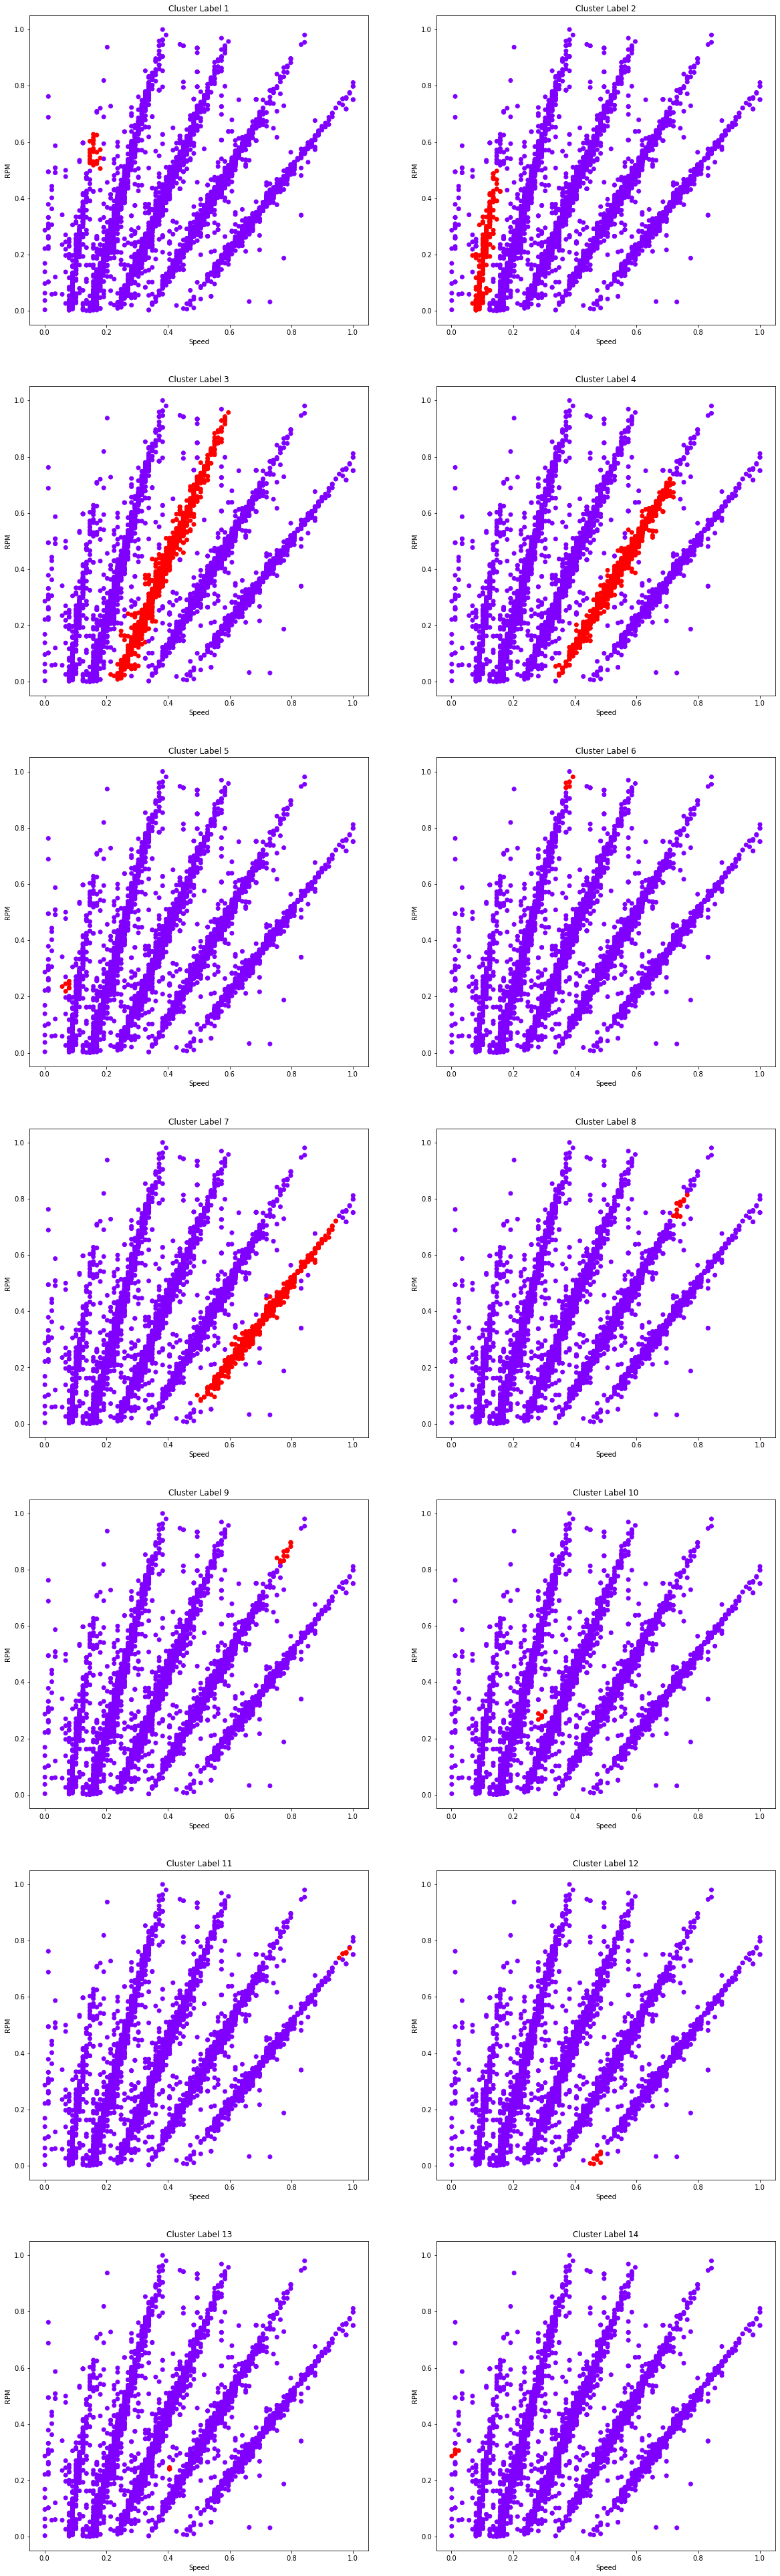

In [124]:
##Plotting daata points belonging to each 16 clusters

plt.figure( figsize=(20,80))
for i in range(1,15) :
  plt.subplot (8,2,i)
  plt.title( "Cluster Label " + str(i))
  plt.xlabel("Speed")
  plt.ylabel("RPM") 
  plt.scatter(x_scaled , y_scaled , c = colors["clr" + str(i)], cmap="rainbow")


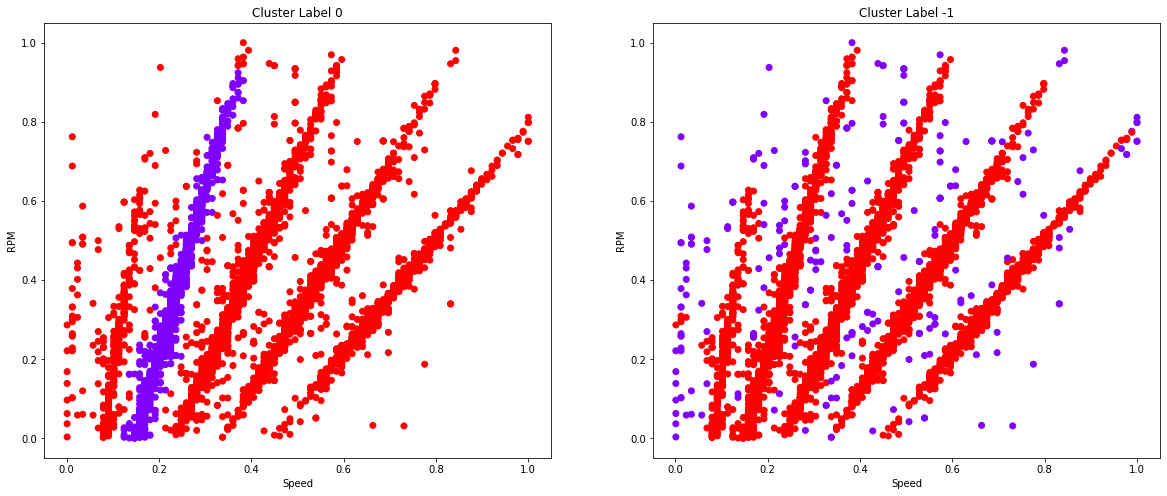

In [125]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.title( "Cluster Label " + str(0))
plt.xlabel("Speed")
plt.ylabel("RPM") 
plt.scatter(x_scaled , y_scaled , c = colors["clr" + str(0)], cmap="rainbow")

plt.subplot(1,2,2)
plt.title( "Cluster Label " + str(-1))
plt.xlabel("Speed")
plt.ylabel("RPM") 
plt.scatter(x_scaled , y_scaled , c = colors["clr" + str(-1)], cmap="rainbow")

### Step 6 : Assigning Gear No.s

According to Suzuki Swift Specification (Slope of the lines) :
* Gear Ratio - 1st Gear	3.545
* Gear Ratio - 2nd Gear	1.904
* Gear Ratio - 3rd Gear	1.280
* Gear Ratio - 4th Gear	0.914
* Gear Ratio - 5th Gear	0.757
* Reverse Gear Ratio	3.272
**bold text**

In [126]:
### Assigning the Gear Ratios to each data point based on the the clusters they belong
## PS: Removed Rows and Noisy points have been assigned 0th gear
## PS: Reverse Gear is assigned with -1

gear = np.zeros_like(clusters1)
for a in range(len(clusters1)):
  if df1.iloc[a]["Cluster Labels"] == 0 :
    gear[a] = 2

  elif df1.iloc[a]["Cluster Labels"] == 1 :
    gear[a] = -1

  elif df1.iloc[a]["Cluster Labels"] == 2 :
    gear[a] = -1

  elif df1.iloc[a]["Cluster Labels"] == 3 :
    gear[a] = 3

  elif df1.iloc[a]["Cluster Labels"] == 4:
   gear[a] = 4

  elif df1.iloc[a]["Cluster Labels"] == 5 :
    gear[a] = -1

  elif df1.iloc[a]["Cluster Labels"] == 6 :
    gear[a] = 2

  elif df1.iloc[a]["Cluster Labels"] == 7 :
    gear[a] = 5

  elif df1.iloc[a]["Cluster Labels"] == 8 :
    gear[a] = 4

  elif df1.iloc[a]["Cluster Labels"] == 9 :
    gear[a] = 4

  elif df1.iloc[a]["Cluster Labels"] == 10 :
    gear[a] = 3

  elif df1.iloc[a]["Cluster Labels"] == 11 :
    gear[a] = 5

  elif df1.iloc[a]["Cluster Labels"] == 12 :
    gear[a] = 5

  elif df1.iloc[a]["Cluster Labels"] == 13 :
    gear[a] = 4

  elif df1.iloc[a]["Cluster Labels"] == 14 :
    gear[a] = 1 
 

In [127]:
## Loading the gear ratio in the dataset under new column and Saving

df1["Gear No._DBSCAN"] = gear

a = df1.index
f_gear = np.zeros(data.shape[0])
for x in a:
  f_gear[x] = df1.loc[x]["Gear No._DBSCAN"] 
f_gear[59]

data["Gear No._DBSCAN"] = f_gear
data.to_csv("dbscan_ouput.csv")

In [128]:
data.head(70)

,Id,Speed,RPM,Engine Load,Gear No._DBSCAN
0,131505,7,898,44,0.0
1,133384,7,898,44,0.0
2,131504,1,917,32,0.0
3,133424,1,917,32,0.0
4,131503,0,774,38,0.0
...,...,...,...,...,...
65,135790,24,1706,41,2.0
66,135738,24,1706,41,2.0
67,135830,25,1783,31,2.0
68,135829,26,1778,20,2.0
